# COGS 118B - Final Project

In [3]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import umap

In [4]:
data = pd.read_csv('CreditCard_dataset.csv')

#drop customer ID column
data.drop(columns=['CUST_ID'], inplace=True)

#replace null values with zeros
data['MINIMUM_PAYMENTS'].fillna(0, inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
null_count = data.isna().sum()

null_count

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [6]:
data.dropna(inplace=True)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
null_count = data.isna().sum()

null_count

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<Axes: >

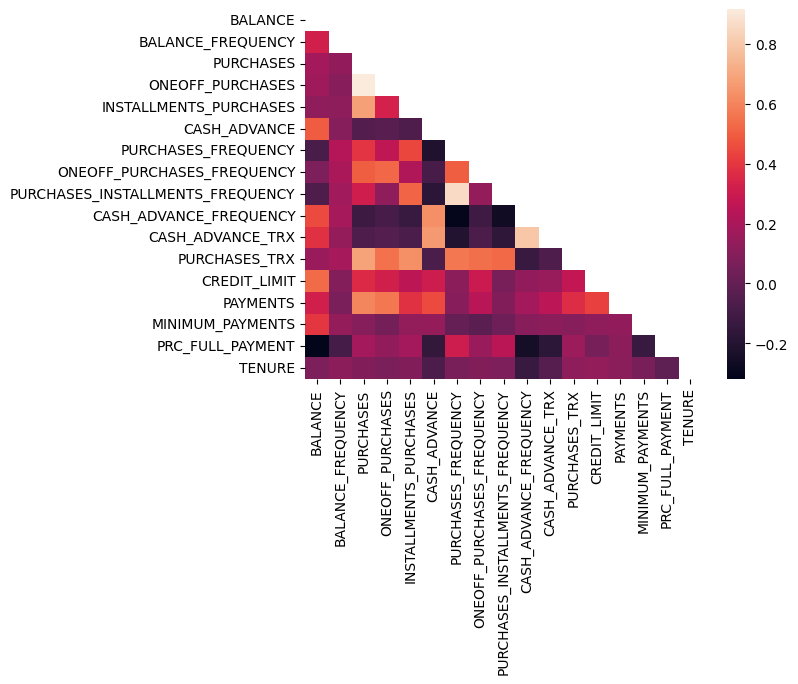

In [9]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask)

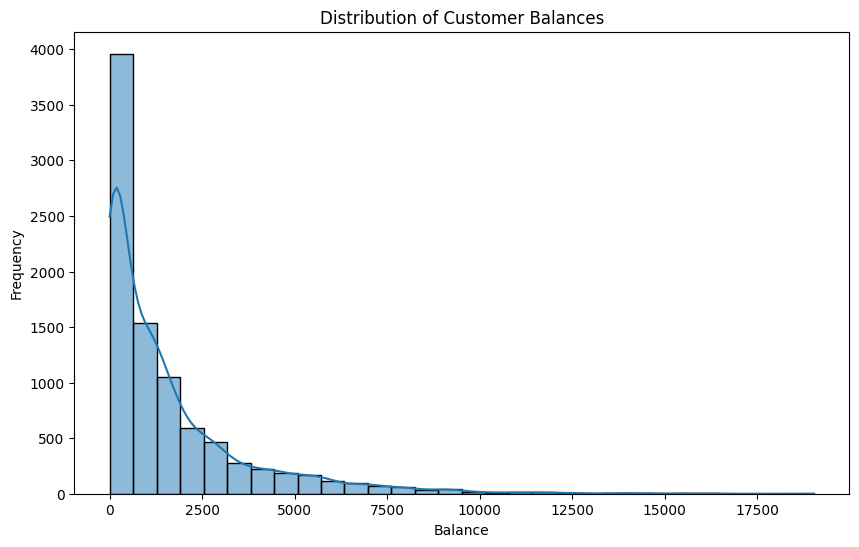

In [10]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a histogram for the 'BALANCE' column
sns.histplot(data['BALANCE'], bins=30, kde=True)

# Add a title and labels to the plot
plt.title('Distribution of Customer Balances')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# Display the plot
plt.show()

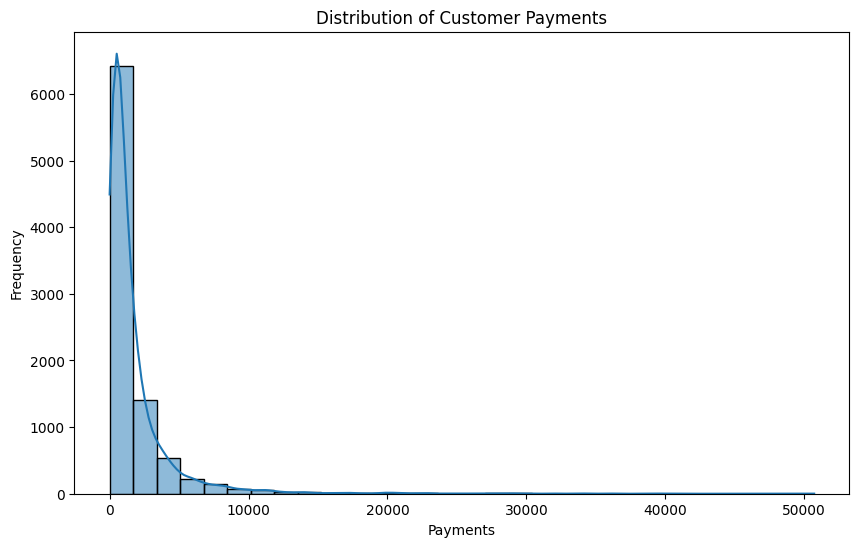

In [11]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a histogram for the 'PAYMENTS' column
sns.histplot(data['PAYMENTS'], bins=30, kde=True)

# Add a title and labels to the plot
plt.title('Distribution of Customer Payments')
plt.xlabel('Payments')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [12]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(data)
scale_data = pd.DataFrame(scale_data, columns=data.columns)
scale_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.297334,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.101998,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.088524,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.357057,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.252265,-0.525588,0.360541


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcas = pca.fit_transform(scale_data)
component_names = [f"PCA{i+1}" for i in range(pcas.shape[1])]
pcas = pd.DataFrame(pcas, columns=component_names)
pcas

,PCA1,PCA2
0,-1.684484,-1.070214
1,-1.132573,2.510221
2,0.968919,-0.383453
3,-0.897250,-0.017764
4,-1.600518,-0.681372
...,...,...
8944,-0.363614,-2.011352
8945,-0.590113,-1.696256
8946,-0.929898,-1.806104
8947,-2.338052,-0.650932


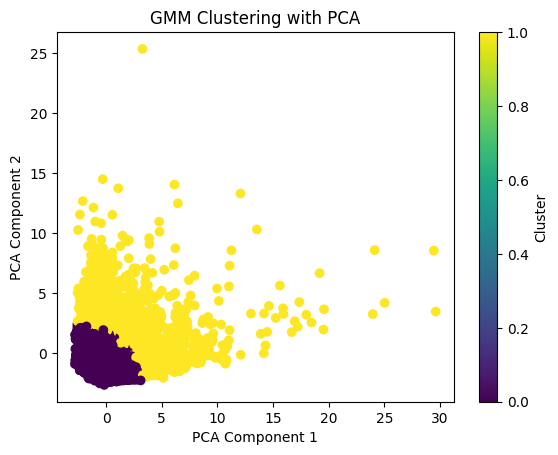

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

scale_data = scale_data.values

pca = PCA(n_components=2)
scale_data_pca = pca.fit_transform(scale_data)

n_components = 2
gmm = GaussianMixture(n_components=n_components)
gmm.fit(scale_data_pca)

# 5. Visualize the results
plt.scatter(scale_data_pca[:, 0], scale_data_pca[:, 1], c=gmm.predict(scale_data_pca), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

gmm = GaussianMixture()

# this is your scoring function for Grid Search
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

# this is the parameters, of which the Grid Search 
# tries all possible combinations... 
# e.g. full+1component, full+2, ... full+7, diag+1, diag+2... 
param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

# docs at
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(
            param_grid=param_grid,
            estimator=gmm,
            scoring=gmm_bic_score,
)
grid_search.fit(scale_data)

KeyboardInterrupt: 

In [ ]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
22,5,full,-29546.698181
23,6,full,-24116.797294
21,4,full,-17537.397532
17,6,diag,-14357.364214
16,5,diag,-12418.223029


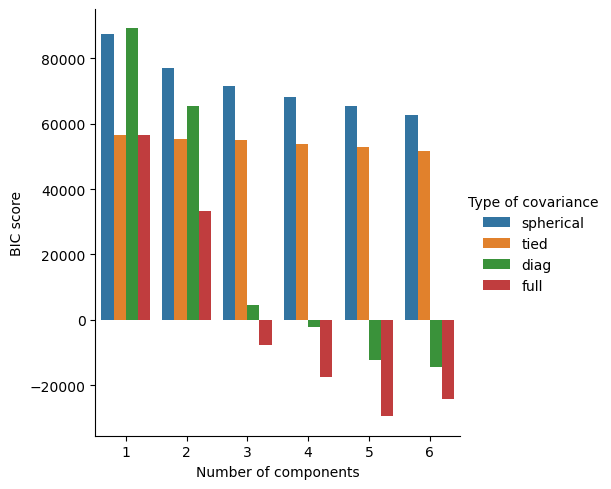

In [ ]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

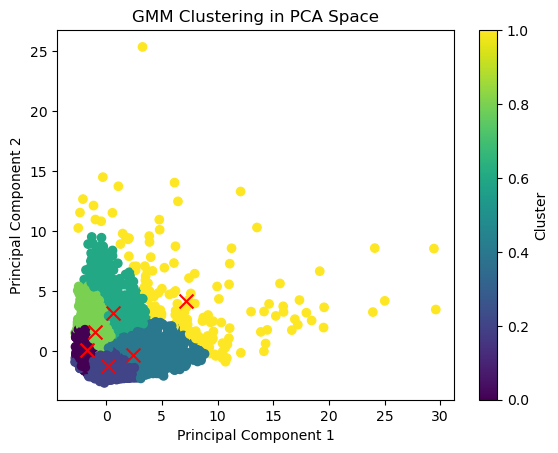

In [ ]:
n_components = 6  
gmm = GaussianMixture(n_components=n_components)
gmm.fit(scale_data_pca)

plt.scatter(scale_data_pca[:, 0], scale_data_pca[:, 1], c=gmm.predict(scale_data_pca))

plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering in PCA Space')
plt.colorbar(label='Cluster')
plt.show()

Visualization of the clustering results may not be feasible due to the high dimensionality of the data. Instead, we rely on quantitative metrics to assess clustering performance.

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd


X = pcas.values

tsne = TSNE(n_components=2, random_state=42)

# Apply T-SNE transformation to your data
X_tsne = tsne.fit_transform(X)

# Assuming X_tsne is a NumPy array with transformed data
# You can convert it to a DataFrame if needed
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_Component_1', 'TSNE_Component_2'])

sns.scatterplot(x='TSNE_Component_1', y='TSNE_Component_2', data=df_tsne)

# PCA BEFORE KMEANS

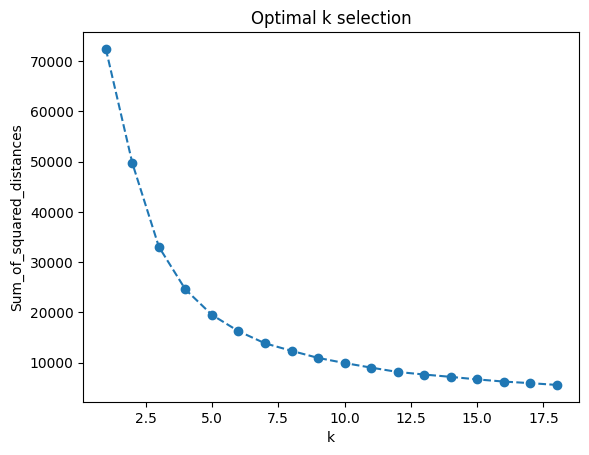

In [16]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pcas)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

In [17]:
km_df = pcas.copy()
km = KMeans(n_clusters=6, n_init=10)
km = km.fit(pcas)
labels = km.labels_

km_df['pred_label'] = labels
sns.scatterplot(pcas, x='PCA1', y='PCA2', hue='pred_label', palette='viridis')

ValueError: Could not interpret value `pc1` for `x`. An entry with this name does not appear in `data`.

# PCA AFTER KMEANS

c:\Users\micha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

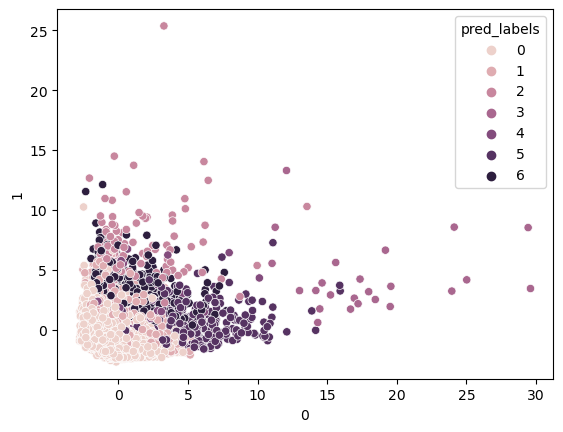

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(data)
labels = kmeans.labels_

pcs_df = pcas.copy()

pcs_df['pred_labels'] = labels

sns.scatterplot(pcs_df, x=0, y=1, hue='pred_labels')

### KMEANS

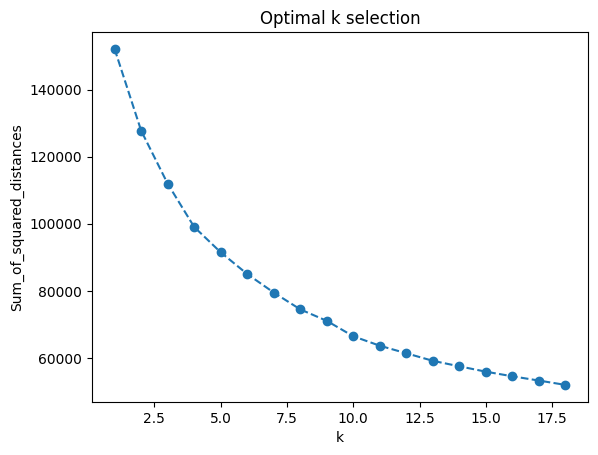

In [18]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(scale_data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

In [19]:
def distortion_measure(points: np.ndarray, centroids: np.ndarray) -> float:
    distortion = 0
    for pt in points.values:
        dists = []
        for c in centroids:
            dists.append(np.sum((pt - c) ** 2) ** 0.5)

        distortion += min(dists)
    return distortion

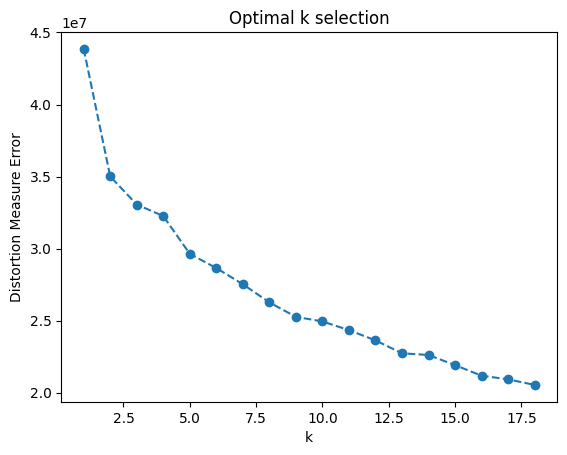

In [20]:
distortion_measure_error = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(data)
    score = distortion_measure(data, km.cluster_centers_)
    distortion_measure_error.append(score)

plt.plot(K, distortion_measure_error, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion Measure Error')
plt.title('Optimal k selection')
plt.show()

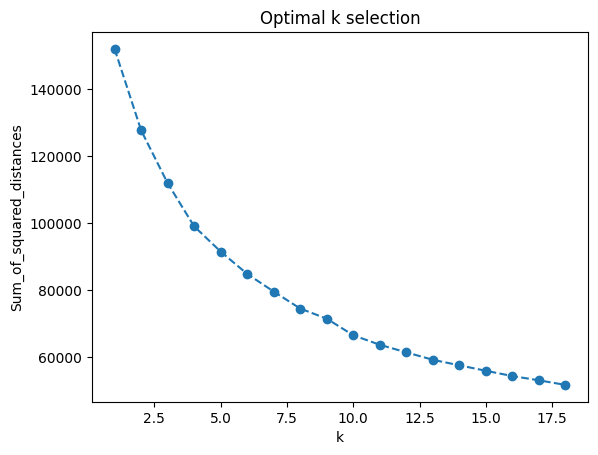

In [21]:
sum_of_squared_distances = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(scale_data)
    sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k selection')
plt.show()

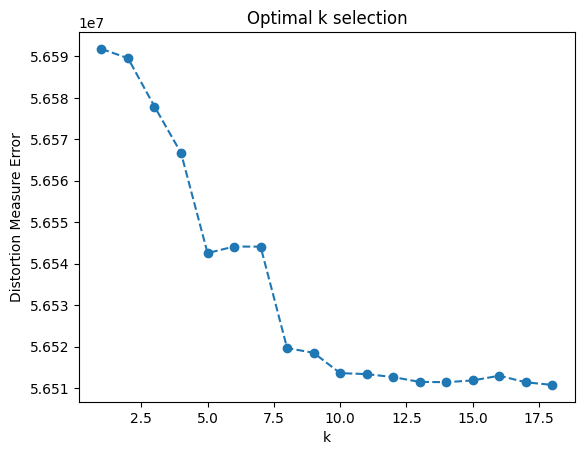

In [22]:
distortion_measure_error = []
K = range(1,19)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(scale_data)
    score = distortion_measure(data, km.cluster_centers_)
    distortion_measure_error.append(score)

plt.plot(K, distortion_measure_error, marker='o', linestyle='--')
plt.xlabel('k')
plt.ylabel('Distortion Measure Error')
plt.title('Optimal k selection')
plt.show()

Based on the graphs we believe when `k` = 7 is the most optimal k selection

In [23]:
km = KMeans(n_clusters=7, n_init=10)
km = km.fit(pcas)
labels = km.labels_

data['pred_label'] = labels

### DBSCAN

<Axes: xlabel='PCA1', ylabel='PCA2'>

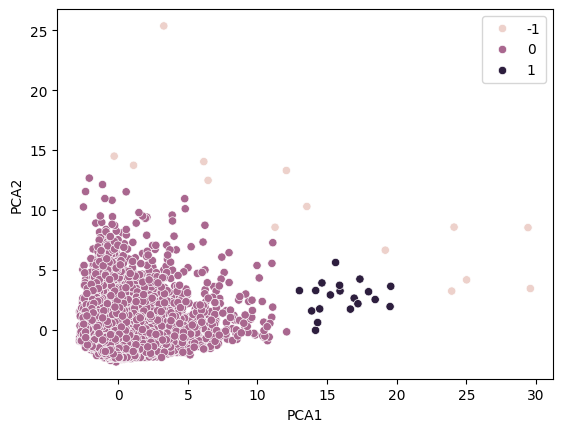

In [24]:
from sklearn.cluster import DBSCAN

# --- Implementing DBSCAN ---
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(pcas)

sns.scatterplot(pcas, x='PCA1' ,y='PCA2', hue=y_dbscan)



## DBSCAN with 3 and 4 PCs

<Axes: xlabel='pc1', ylabel='pc2'>

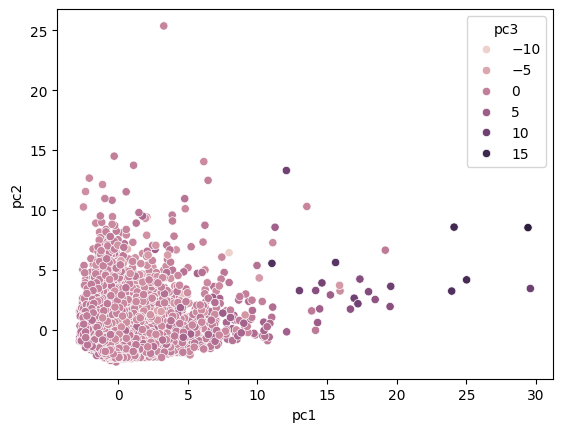

In [25]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(scale_data)
pcs = pd.DataFrame(pcs, columns=['pc1', 'pc2', 'pc3'])
pcs.index = data.index

sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='pc3')

<Axes: xlabel='pc2', ylabel='pc3'>

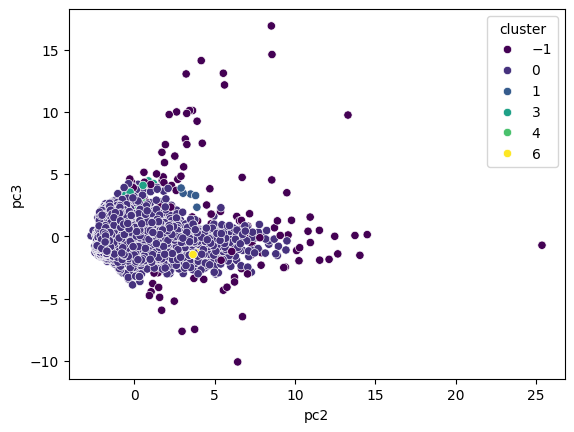

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.impute import KNNImputer
dbscan = DBSCAN(eps=1, min_samples=4)
pcs['cluster'] = dbscan.fit_predict(pcs[['pc1', 'pc2', 'pc3']])

sns.scatterplot(data=pcs, x='pc2', y='pc3', hue='cluster', palette='viridis')

<Axes: xlabel='pc1', ylabel='pc2'>

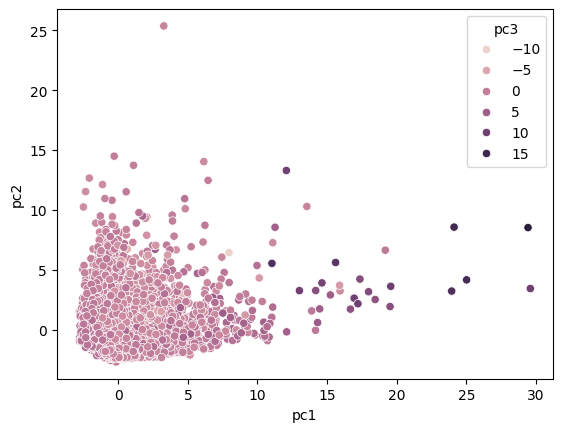

In [27]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

pca = PCA(n_components=4)
pcs = pca.fit_transform(scale_data)
pcs = pd.DataFrame(pcs, columns=['pc1', 'pc2', 'pc3', 'pc4'])
pcs.index = data.index

sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='pc3')

<Axes: xlabel='pc1', ylabel='pc2'>

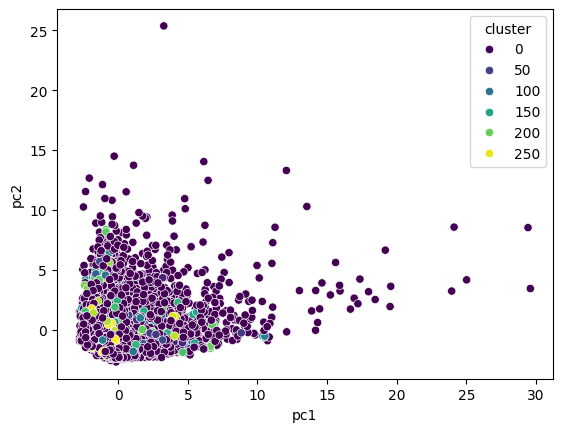

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=2)

dbscan.fit(pcs)

pcs['cluster'] = dbscan.labels_

sns.scatterplot(data=pcs, x='pc1', y='pc2', hue='cluster', palette='viridis')

### Gaussian

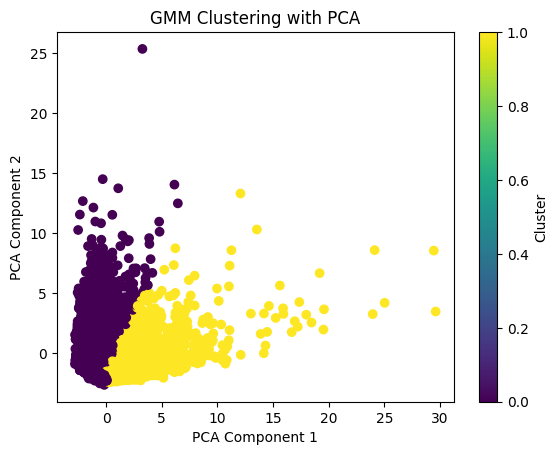

In [29]:
n_components = 2
gmm = GaussianMixture(n_components=n_components)
gmm.fit(pcas)

# 5. Visualize the results
plt.scatter(pcas['PCA1'], pcas['PCA2'], c=gmm.predict(pcas), cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()

### Heirarchical

In [35]:
normalize_df = normalize(pcas)

pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(normalize_df), columns=['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.684484,-1.070214
1,-1.132573,2.510221
2,0.968919,-0.383453
3,-0.897250,-0.017764
4,-1.600518,-0.681372
...,...,...
8944,-0.363614,-2.011352
8945,-0.590113,-1.696256
8946,-0.929898,-1.806104
8947,-2.338052,-0.650932


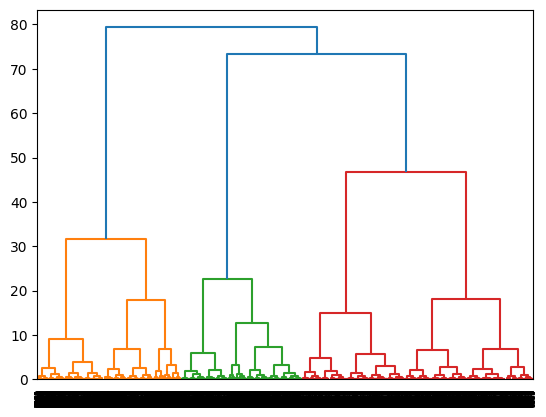

In [31]:
linkage_ward = linkage(pca_df, method ='ward')

Dendogram = dendrogram(linkage_ward) 

In [32]:
"""clust = fcluster(linkage_ward, criterion='distance', t=50) 
data['clust'] = clust"""

"clust = fcluster(linkage_ward, criterion='distance', t=50) \ndata['clust'] = clust"

<Axes: >

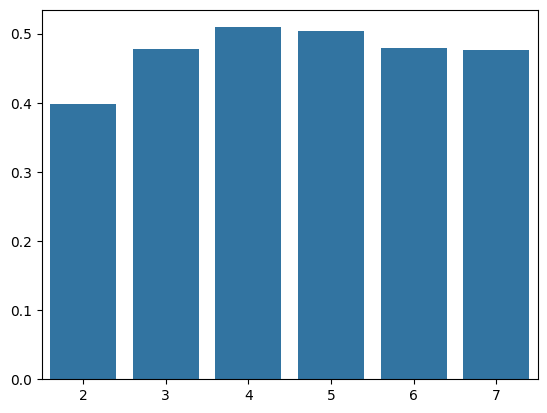

In [33]:
silhouette_scores = []
cluster_range = range(2, 8)
for n in cluster_range:
    silhouette_scores.append( 
        silhouette_score(pca_df, AgglomerativeClustering(n_clusters = n).fit_predict(pca_df))) 

sns.barplot(x=cluster_range, y=silhouette_scores)
